# Trabalho Prático

Imports

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

### Leitura do Arquivo CSV:

In [267]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
3,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
4,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
915,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
916,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


### Tratamento de dados categóricos

In [268]:

label_data = ['Sex', 'ExerciseAngina', 'Oldpeak', 'RestingECG', 'ST_Slope']

one_hot_data = ['ChestPainType']

lb = LabelEncoder() 


for col in label_data:
    data[col] = lb.fit_transform(data[col])
    
#Use pandas get_dummies for one-hot encoding
data = pd.get_dummies(data, columns=one_hot_data)

data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,10,2,0,False,True,False,False
1,37,1,130,283,0,2,98,0,10,2,0,False,True,False,False
2,54,1,150,195,0,1,122,0,10,2,0,False,False,True,False
3,39,1,120,339,0,1,170,0,10,2,0,False,False,True,False
4,45,0,130,237,0,1,170,0,10,2,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,57,0,140,241,0,1,123,1,12,1,1,True,False,False,False
914,45,1,110,264,0,1,132,0,22,1,1,False,False,False,True
915,68,1,144,193,1,1,141,0,42,1,1,True,False,False,False
916,57,1,130,131,0,1,115,1,22,1,1,True,False,False,False


### Separar teste e treino

In [269]:

x = data.drop(columns=["HeartDisease"])
y = data["HeartDisease"]

X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.20, random_state = 23)


### Criar modelo

In [270]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

#Teste do Modelo
prevision = modelo.predict(X_teste)


### Gerar matriz de confusão

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x28005eb50>,
                estimator=DecisionTreeClassifier(criterion='entropy'))

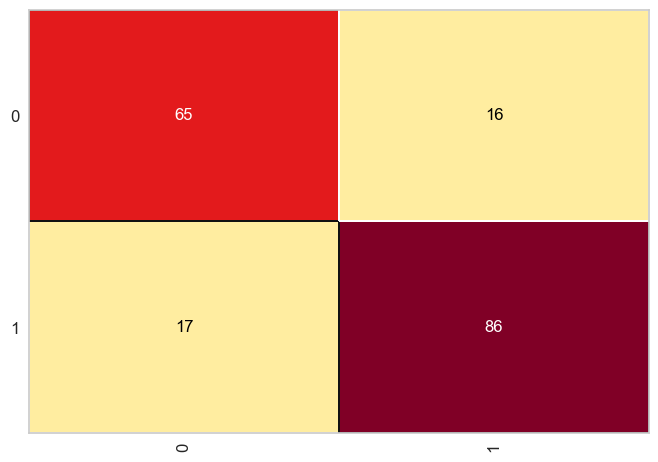

In [271]:
confusion_matrix(y_teste, prevision)
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

cm

In [272]:
print(classification_report(y_teste, prevision))
print(accuracy_score(y_teste, prevision))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        81
           1       0.84      0.83      0.84       103

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

0.8206521739130435


### Plotando a árvore

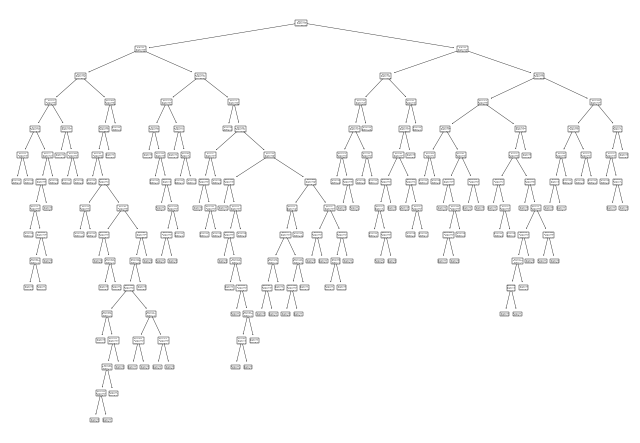

In [273]:
tree.plot_tree(Y)
plt.show()